<a href="https://colab.research.google.com/github/aldonat/SIB_BISA-AI-Academy/blob/main/Metode_Segmentasi_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Berbasis Tresholding

**Segmentasi Berbasis Tresholding:** <br>
Metode ini membagi citra menjadi beberapa bagian berdasarkan ambang tertentu. Jika nilai piksel melebihi ambang tertentu, piksel tersebut dianggap bagian dari satu kelas, jika tidak, dianggap bagian dari kelas yang lain.

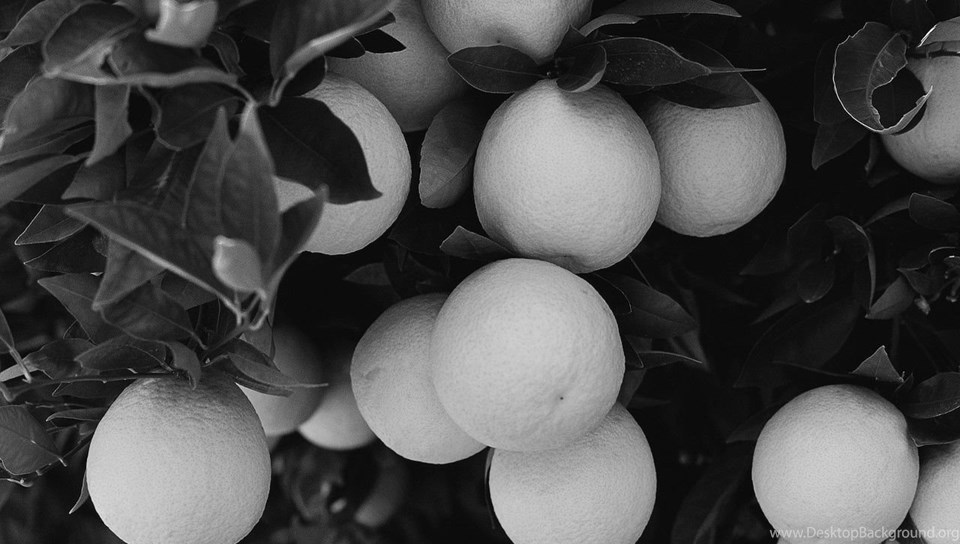

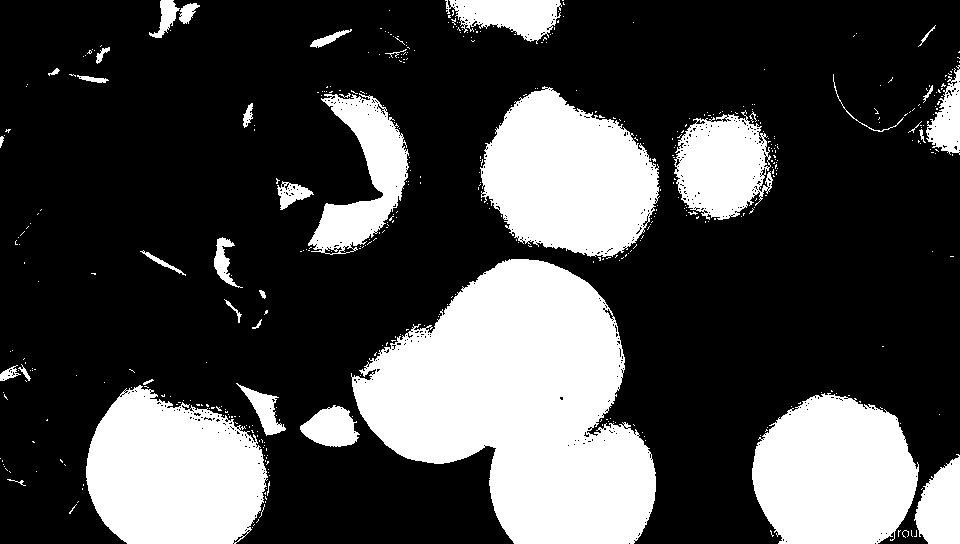

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load citra grayscale
image = cv2.imread('citra.jpg', 0)

# Tresholding
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Menampilkan citra asli dan hasil segmentasi
cv2_imshow(image) # Original Image
cv2_imshow(binary_image) # Binary Image
cv2.waitKey(0)
cv2.destroyAllWindows()


#Segmentasi Berbasis Kontur

**Segmentasi Berbasis Kontur:** <br>
Metode ini berfokus pada deteksi tepi atau kontur di dalam citra untuk memisahkan objek dari latar belakang. Metode populer termasuk operator Sobel, Canny, dan Prewitt.



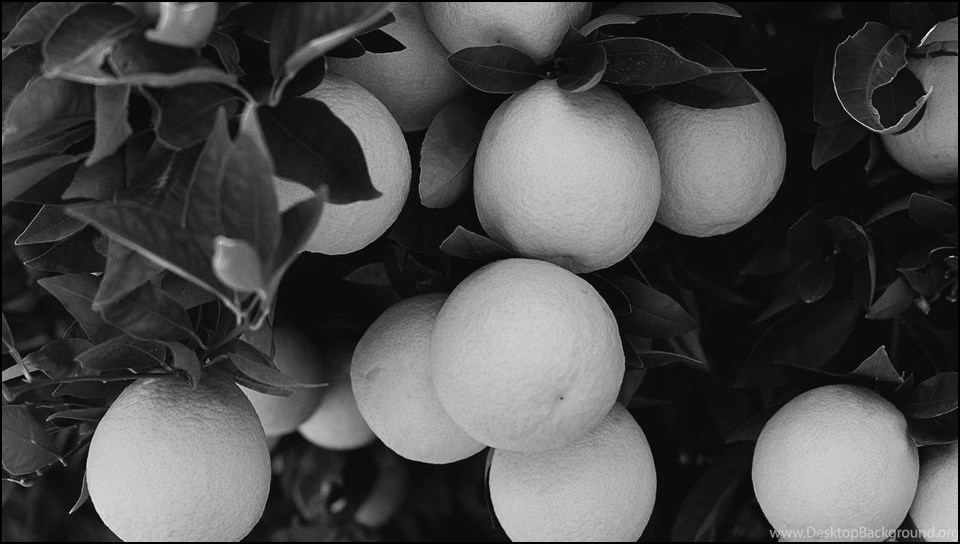

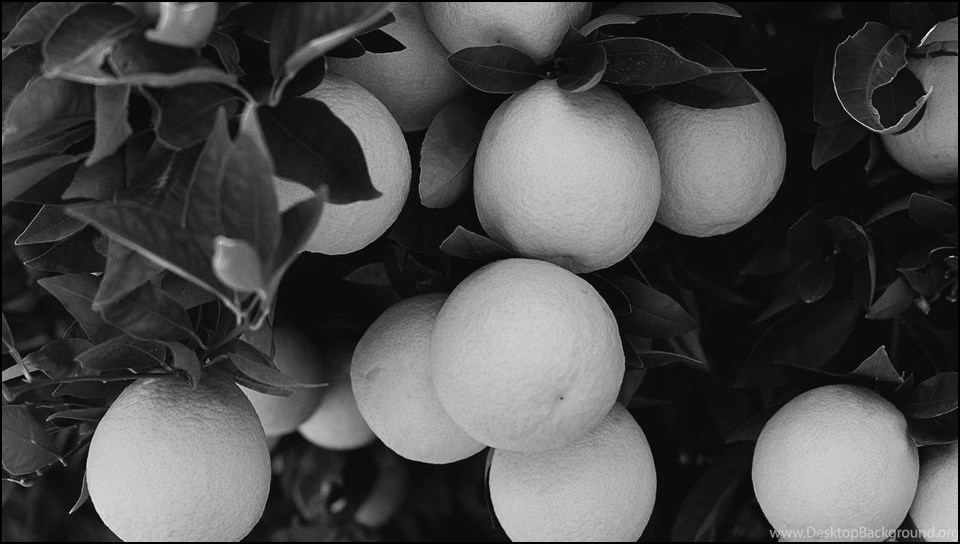

In [ ]:
import cv2

# Load citra grayscale
image = cv2.imread('citra.jpg', 0)

# Deteksi kontur
contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar kontur pada citra asli
contour_image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Menampilkan citra asli dan kontur
cv2_imshow(contour_image) #Original Image with Contours
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
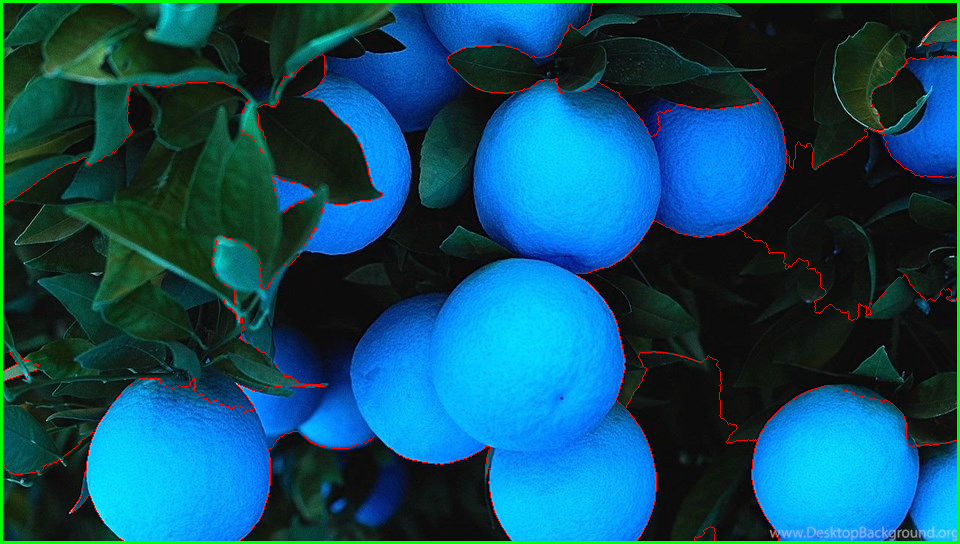

In [ ]:
import numpy as np
import cv2 as cv
im = cv.imread('citra.jpg',1)

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)

cv.drawContours(img, contours, -1, (0,255,0), 3)

#Segmentasi Berbasis Cluster

**Segmentasi Berbasis Cluster:** <br>
Metode ini menggunakan algoritma clustering seperti K-Means untuk membagi piksel menjadi kelompok berdasarkan kesamaan fitur.

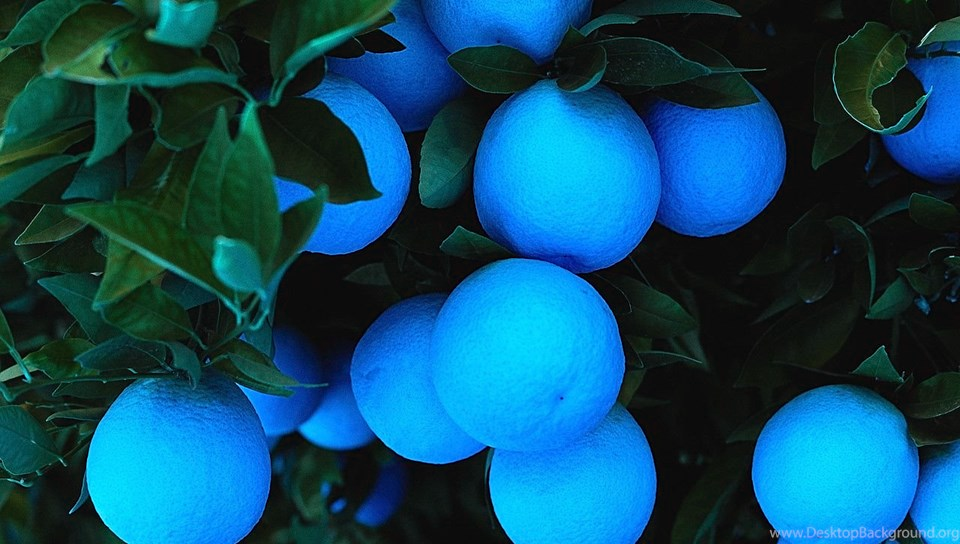

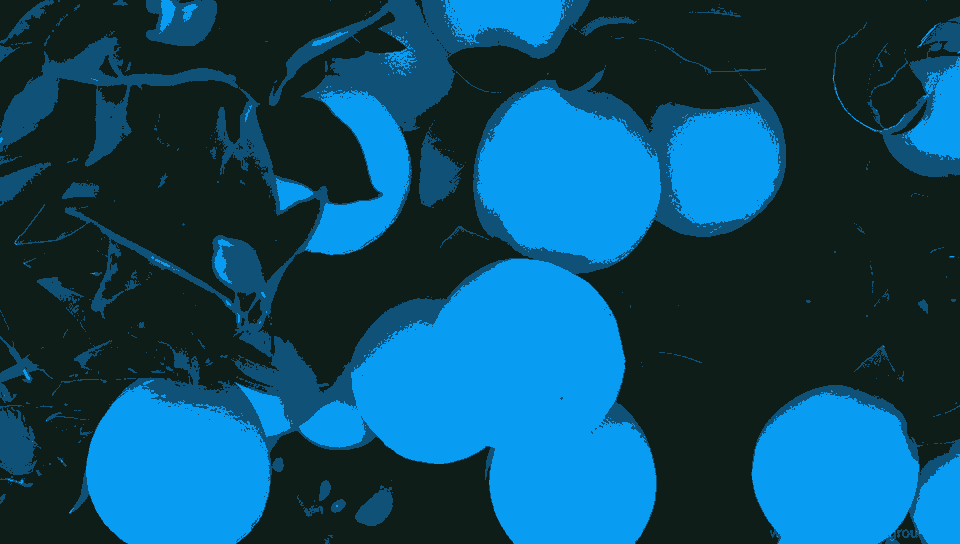

In [ ]:
import cv2
import numpy as np

# Load citra
image = cv2.imread('citra.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Ubah citra menjadi array 1D
pixels = np.float32(image.reshape((-1, 3)))

# Tentukan jumlah cluster
num_clusters = 3

# Lakukan k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi pusat cluster ke tipe integer
centers = np.uint8(centers)

# Konversi setiap piksel ke warna pusat cluster
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Menampilkan citra asli dan hasil segmentasi
cv2_imshow(image)
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Segmentasi Berbasis Watershed

**Segmentasi Berbasis Watershed:** <br> Metode ini terinspirasi dari geografi. Citra dianggap sebagai lanskap topografi di mana air mengalir dari puncak tertinggi ke lembah terendah. Pemisahan objek terjadi di "lembah" antara "gunung".

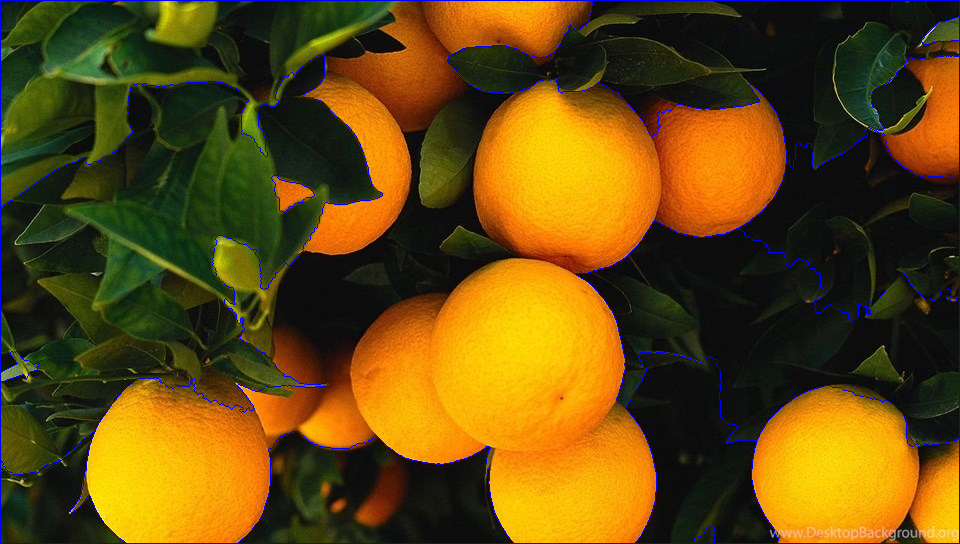

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('citra.jpg')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

# Segmentasi Berbasis Region

**Segmentasi Berbasis Region:**<br>
Metode ini membagi citra menjadi wilayah atau region berdasarkan kriteria tertentu seperti warna, tekstur, atau kepadatan piksel.

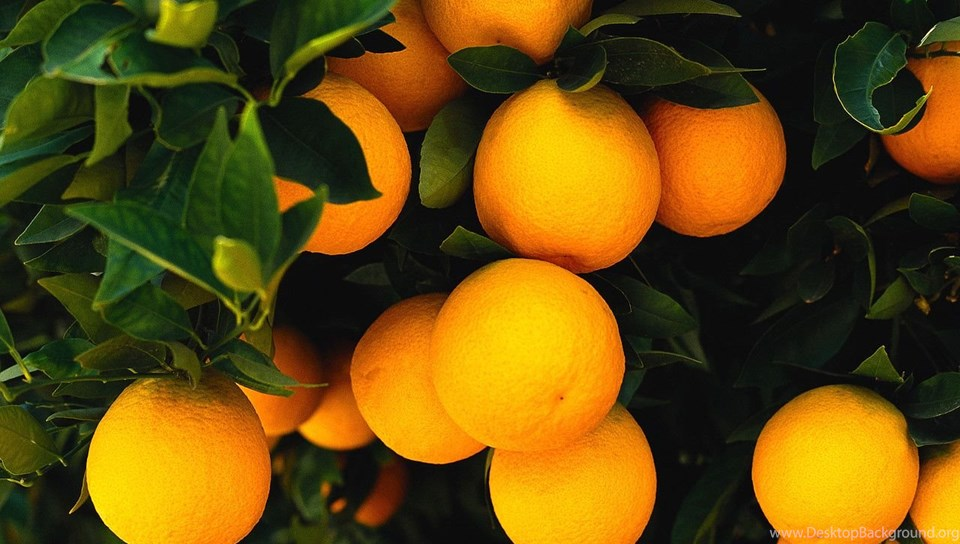

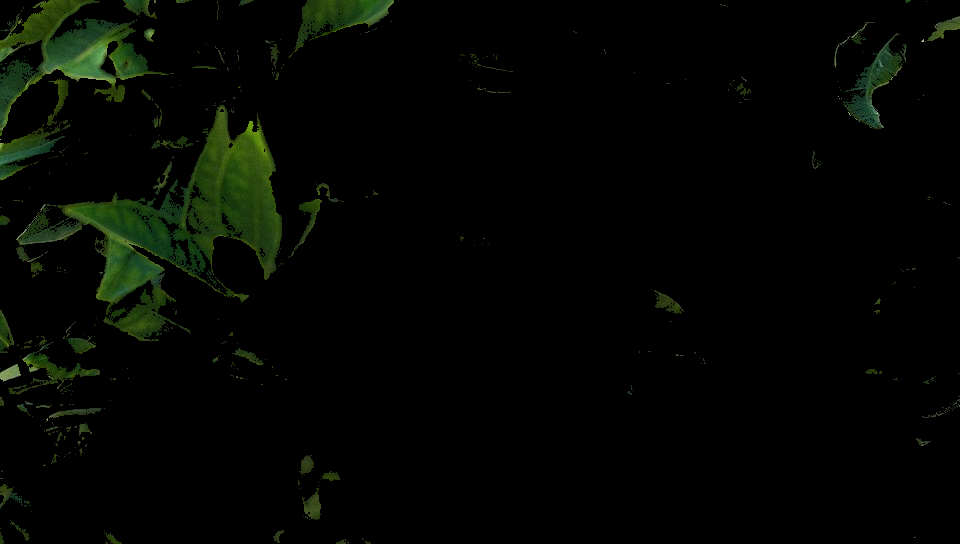

In [ ]:
import cv2
import numpy as np

# Load citra
image = cv2.imread('citra.jpg')

# Konversi ke HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tentukan batas atas dan bawah untuk warna tertentu (misalnya, hijau)
lower_green = np.array([40, 50, 50])
upper_green = np.array([80, 255, 255])

# Buat mask menggunakan batas warna
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Apply mask to original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Menampilkan citra asli dan hasil segmentasi
cv2_imshow(image)
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Segmentasi Berbasis Tekstur

**Segmentasi Berbasis Tekstur:** <br>
Metode ini memisahkan objek berdasarkan perbedaan tekstur dalam citra.

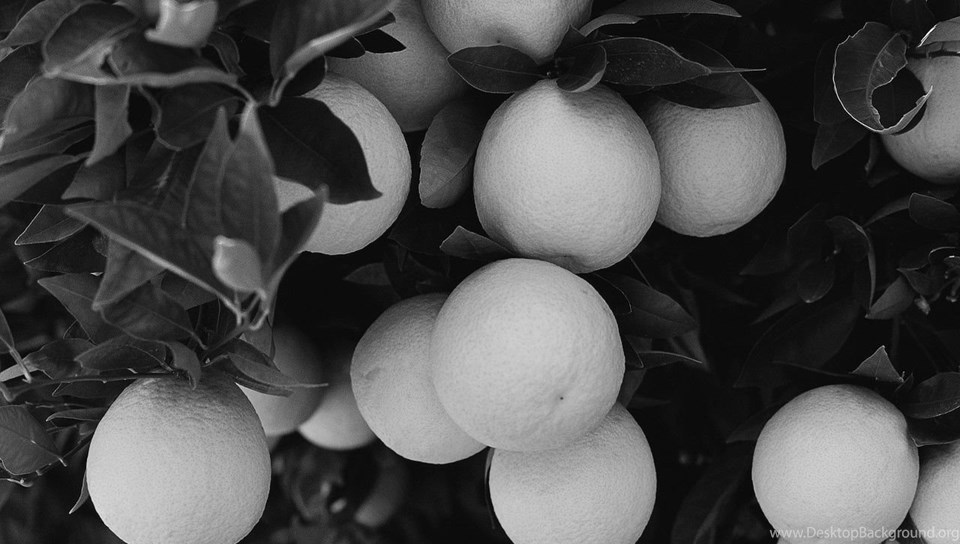

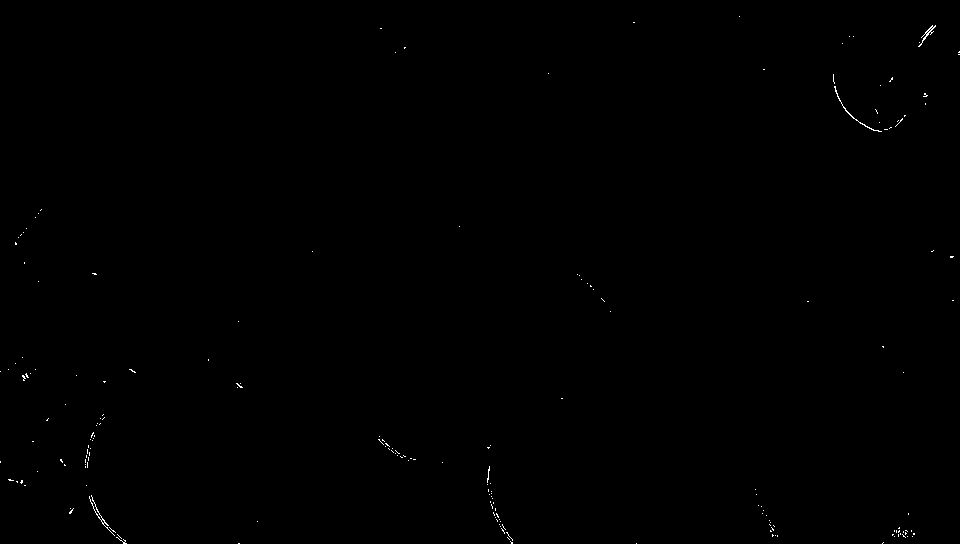

In [ ]:
import cv2

# Load citra grayscale
image = cv2.imread('citra.jpg', 0)

# Terapkan filter Gaussian untuk menghaluskan citra
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Terapkan operator Laplacian untuk mengekstrak tepi
laplacian_image = cv2.Laplacian(smoothed_image, cv2.CV_64F)

# Ambil nilai absolut untuk mendapatkan citra tepi
laplacian_image = cv2.convertScaleAbs(laplacian_image)

# Binarisasi citra tepi
_, binary_image = cv2.threshold(laplacian_image, 30, 255, cv2.THRESH_BINARY)

# Menampilkan citra asli dan hasil segmentasi
cv2_imshow(image)
cv2_imshow(binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#Segmentasi Berbasis Berorientasi

**Segmentasi Berbasis Berorientasi:** Metode ini membagi citra berdasarkan orientasi garis atau pola tertentu

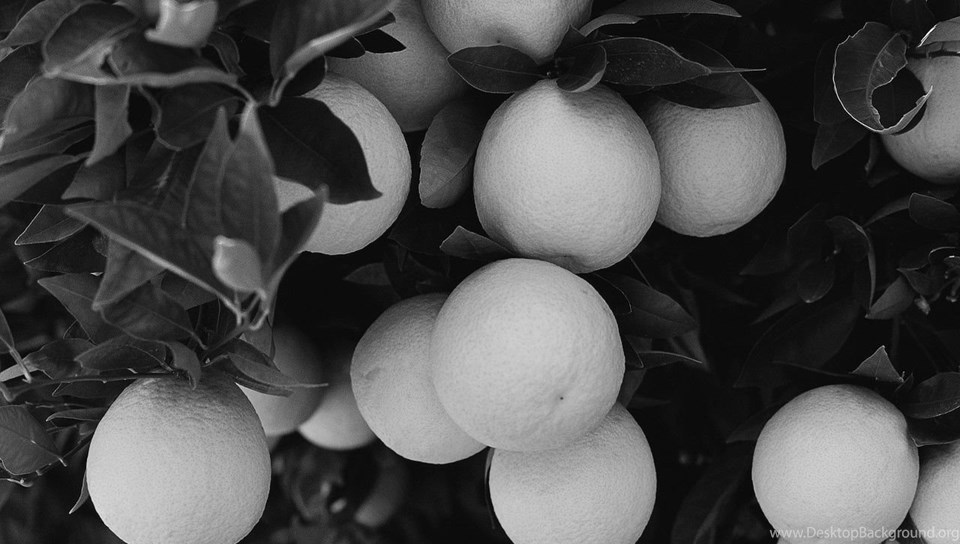

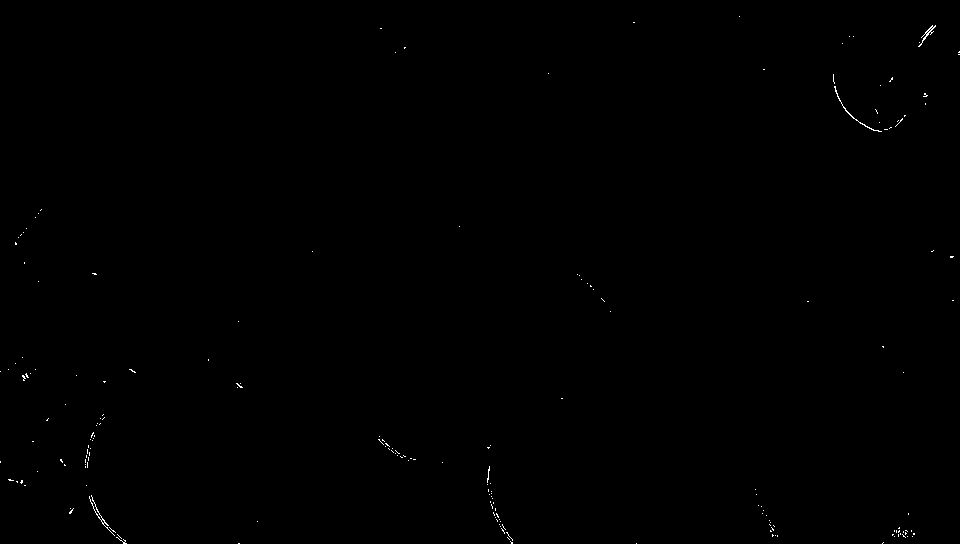

In [ ]:
import cv2

# Load citra grayscale
image = cv2.imread('citra.jpg', 0)

# Terapkan filter Gaussian untuk menghaluskan citra
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Terapkan operator Laplacian untuk mengekstrak tepi
laplacian_image = cv2.Laplacian(smoothed_image, cv2.CV_64F)

# Ambil nilai absolut untuk mendapatkan citra tepi
laplacian_image = cv2.convertScaleAbs(laplacian_image)

# Binarisasi citra tepi
_, binary_image = cv2.threshold(laplacian_image, 30, 255, cv2.THRESH_BINARY)

# Menampilkan citra asli dan hasil segmentasi
cv2_imshow(image)
cv2_imshow(binary_image)
cv2.waitKey(0)
cv2.destroyAllWindows()